# Script 4 -  Supervised Classification

# Librairies 

In [ ]:
install.packages("partykit")

In [5]:
library(partykit)
library(vegan)
library(dendextend)
library(randomForest)

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: permute

Registered S3 method overwritten by 'dendextend':
  method     from 
  rev.hclust vegan


---------------------
Welcome to dendextend version 1.17.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:permute’:

    shuffle


The following object is masked from ‘package:stats’:

    cutree


randomForest 4.7-1

# Loading data

<div style="padding: 10px; border:1px solid green; font-size: 10px;">
  <span style="font-size: 15px;"> <i>Loading the data from Doubs</i> </span><br/>
</div>

In [3]:
# load data -----
load("Doubs.RData")  

# 1 Classification trees (CT) -> *ctree()*

<div style="border: 5px solid darkgreen; padding: 15px; border-radius: 0px;">
  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1; padding-right: 20px;">
      <ul>
        <li>Used for <strong>qualitative (categorical) response variables</strong></li>
        <li>Use <strong>multiple explanatory variables</strong></li>
        <li>Apply <strong>binary logical conditions</strong> to split data into nodes</li>
      </ul>
    </div>
    <div style="flex: 1;">
      <img src="images/decision_tree.png" alt="Decision Tree" style="max-width: 70%;">
    </div>
  </div>
</div>


## 1.1 Building Classification Tree -> *ctree(response ~ predictors, data = df)*

- **response ~ predictors** → *Formula specifying the categorical response and explanatory variables (use **response ~ `.`** to use all predictors* )
- **predictors** : *explanatory variables* (`col1` + `col2` + `col3` +... )
- **df** → *Data frame containing the variables*

**Outputs** :

Each line means:

- **[Node number]**: *Unique ID of the node*.

- **Split condition**: *e.g., Petal.Length > 1.9*.

- **Prediction**: *What class/value is predicted at that node*.

- **n** = *Number of samples in this group*.

- **err** = *Misclassification error rate at this node (optional, for classification)*.

- **Number of inner nodes:** = *decision splits*

- **Number of terminal nodes:** = *final outcomes*

### 1.1.1 **Build a classification tree** to **predict Species** based on **four features** (*petal lenght*, *petal width*, *sepal length*, *sepal width*)  in the iris dataset

In [ ]:
library(partykit)

In [6]:
# Build a classification tree to predict Species based on all four features(petal lenght, petal width, sepal length, sepal width)  in the iris dataset
irisct <- ctree(Species ~ Petal.Length + Petal.Width + Sepal.Length + Sepal.Width, data = iris)

# Display a textual summary of the tree structure and splits
irisct


Model formula:
Species ~ Petal.Length + Petal.Width + Sepal.Length + Sepal.Width

Fitted party:
[1] root
|   [2] Petal.Length <= 1.9: setosa (n = 50, err = 0.0%)
|   [3] Petal.Length > 1.9
|   |   [4] Petal.Width <= 1.7
|   |   |   [5] Petal.Length <= 4.8: versicolor (n = 46, err = 2.2%)
|   |   |   [6] Petal.Length > 4.8: versicolor (n = 8, err = 50.0%)
|   |   [7] Petal.Width > 1.7: virginica (n = 46, err = 2.2%)

Number of inner nodes:    3
Number of terminal nodes: 4

### 1.1.2 **Build a classification tree** to **predict Species** based on  **all features** in the iris dataset

In [7]:
# Build a classification tree to predict Species based on all  features in the iris dataset
irisct2 <- ctree(Species ~ .,data = iris)
# Display a textual summary of the tree structure and splits
irisct2


Model formula:
Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width

Fitted party:
[1] root
|   [2] Petal.Length <= 1.9: setosa (n = 50, err = 0.0%)
|   [3] Petal.Length > 1.9
|   |   [4] Petal.Width <= 1.7
|   |   |   [5] Petal.Length <= 4.8: versicolor (n = 46, err = 2.2%)
|   |   |   [6] Petal.Length > 4.8: versicolor (n = 8, err = 50.0%)
|   |   [7] Petal.Width > 1.7: virginica (n = 46, err = 2.2%)

Number of inner nodes:    3
Number of terminal nodes: 4

## 1.2 Plotting Classification Tree → *plot(ctree_object, inner_panel = NULL)*

- **ctree_object** → *Classification tree object created by `ctree()`*  
- **inner_panel** → *Optional argument to customize node display:*  
  - `NULL` (default) shows split labels and predicted classes  
  - `node_barplot` shows barplots of class distributions in each node  


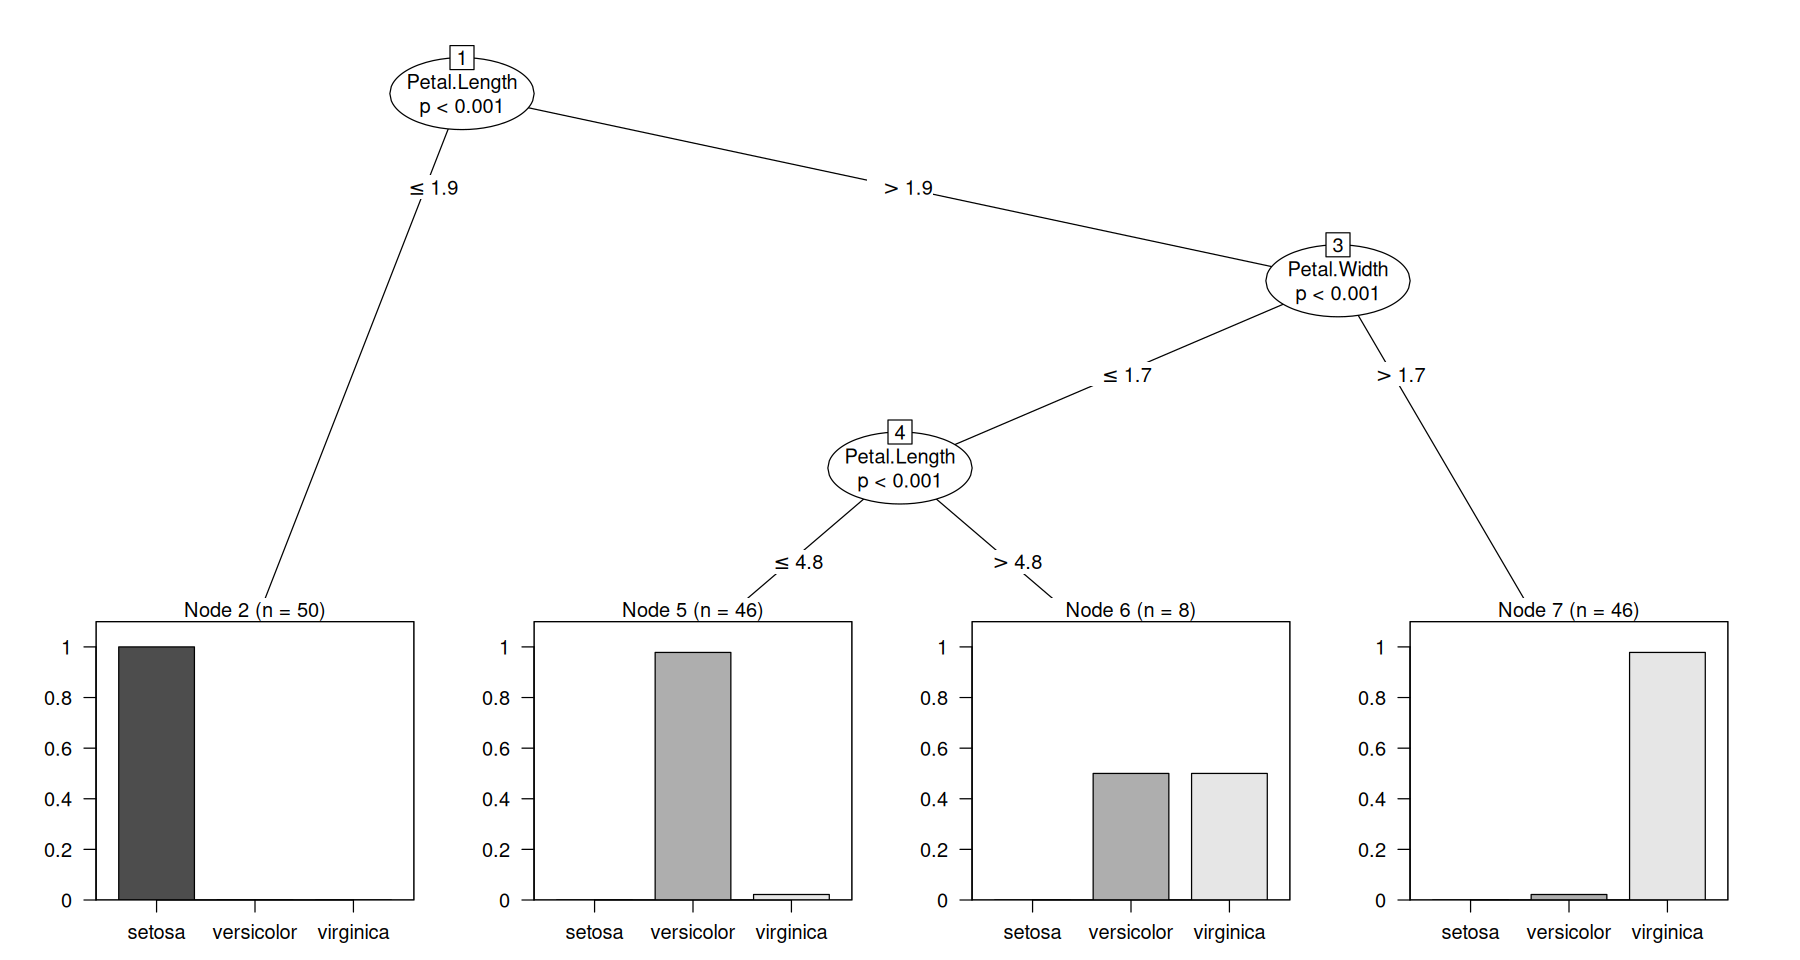

In [9]:
# Set plot size in Jupyter Notebook (15 x 8 inches)
options(repr.plot.width = 15, repr.plot.height = 8)

# Plot the classification tree for visual interpretation of "irisct"
plot(irisct)

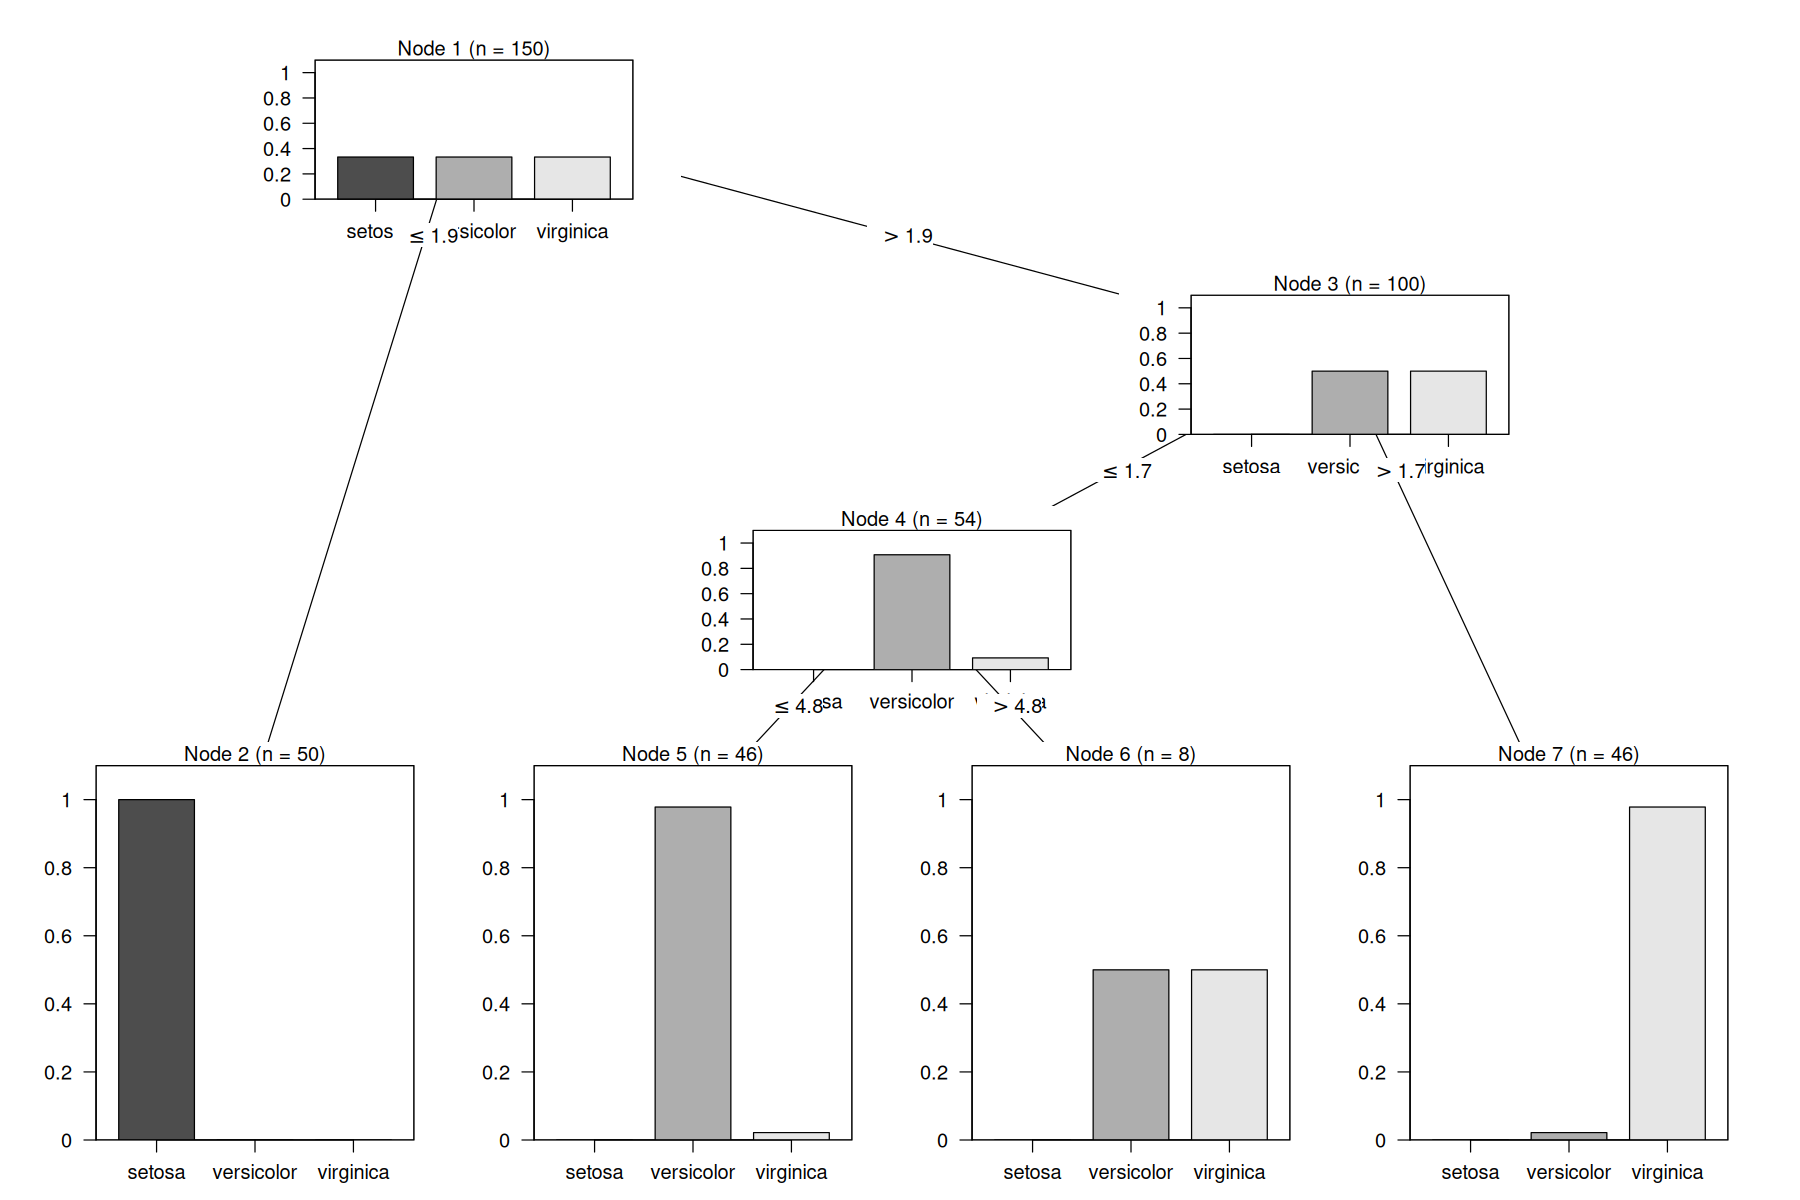

In [12]:
# Set plot size in Jupyter Notebook (15 x 10 inches)
options(repr.plot.width = 15, repr.plot.height = 10)

# Plot the classification tree for visual interpretation of "irisct2"
# Use bar plots inside the nodes to show the class distribution
plot(irisct2, inner_panel = node_barplot)


# 2 Regression Trees (RT) -> *ctree()*

<div style="border: 5px solid darkgreen; padding: 15px; border-radius: 0px;">
  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1; padding-right: 20px;">
    <ul>
      <li>Used for <strong>quantitative (numerical) response variables</strong></li>
      <li>Use <strong>multiple explanatory variables</strong></li>
      <li>Apply <strong>binary logical conditions</strong> to split data into nodes</li>
      <li>The response is a <strong>continuous variable</strong> </li>
    </ul>
  </div>
  <div style="flex: 1;">
    <img src="images/Regression Tress.png" alt="Regression Tree" style="max-width: 40%;">
  </div>
</div>



## 2.1 Building Regression Tree → *ctree(response ~ predictors, data = df)*

- **response ~ predictors** → *Formula specifying the **quantitative response** and explanatory variables (use **response ~ `.`** to use all predictors)*
- **predictors** : *explanatory variables* (`col1` + `col2` + `col3` + ... )
- **df** → *Data frame containing both the response and predictors*

In [3]:
# Build regression tree: Petal.Length as response
reg_tree <- ctree(Petal.Length ~ Sepal.Length + Sepal.Width + Petal.Width, data = iris)

reg_tree


Model formula:
Petal.Length ~ Sepal.Length + Sepal.Width + Petal.Width

Fitted party:
[1] root
|   [2] Petal.Width <= 0.6: 1.462 (n = 50, err = 1.5)
|   [3] Petal.Width > 0.6
|   |   [4] Sepal.Length <= 6.2
|   |   |   [5] Petal.Width <= 1.3
|   |   |   |   [6] Sepal.Length <= 5.5: 3.667 (n = 9, err = 1.5)
|   |   |   |   [7] Sepal.Length > 5.5: 4.081 (n = 16, err = 1.3)
|   |   |   [8] Petal.Width > 1.3
|   |   |   |   [9] Petal.Width <= 1.7: 4.623 (n = 13, err = 2.1)
|   |   |   |   [10] Petal.Width > 1.7: 5.000 (n = 11, err = 0.3)
|   |   [11] Sepal.Length > 6.2
|   |   |   [12] Sepal.Length <= 7
|   |   |   |   [13] Petal.Width <= 1.7: 4.667 (n = 15, err = 0.8)
|   |   |   |   [14] Petal.Width > 1.7: 5.483 (n = 24, err = 2.0)
|   |   |   [15] Sepal.Length > 7: 6.300 (n = 12, err = 1.4)

Number of inner nodes:    7
Number of terminal nodes: 8

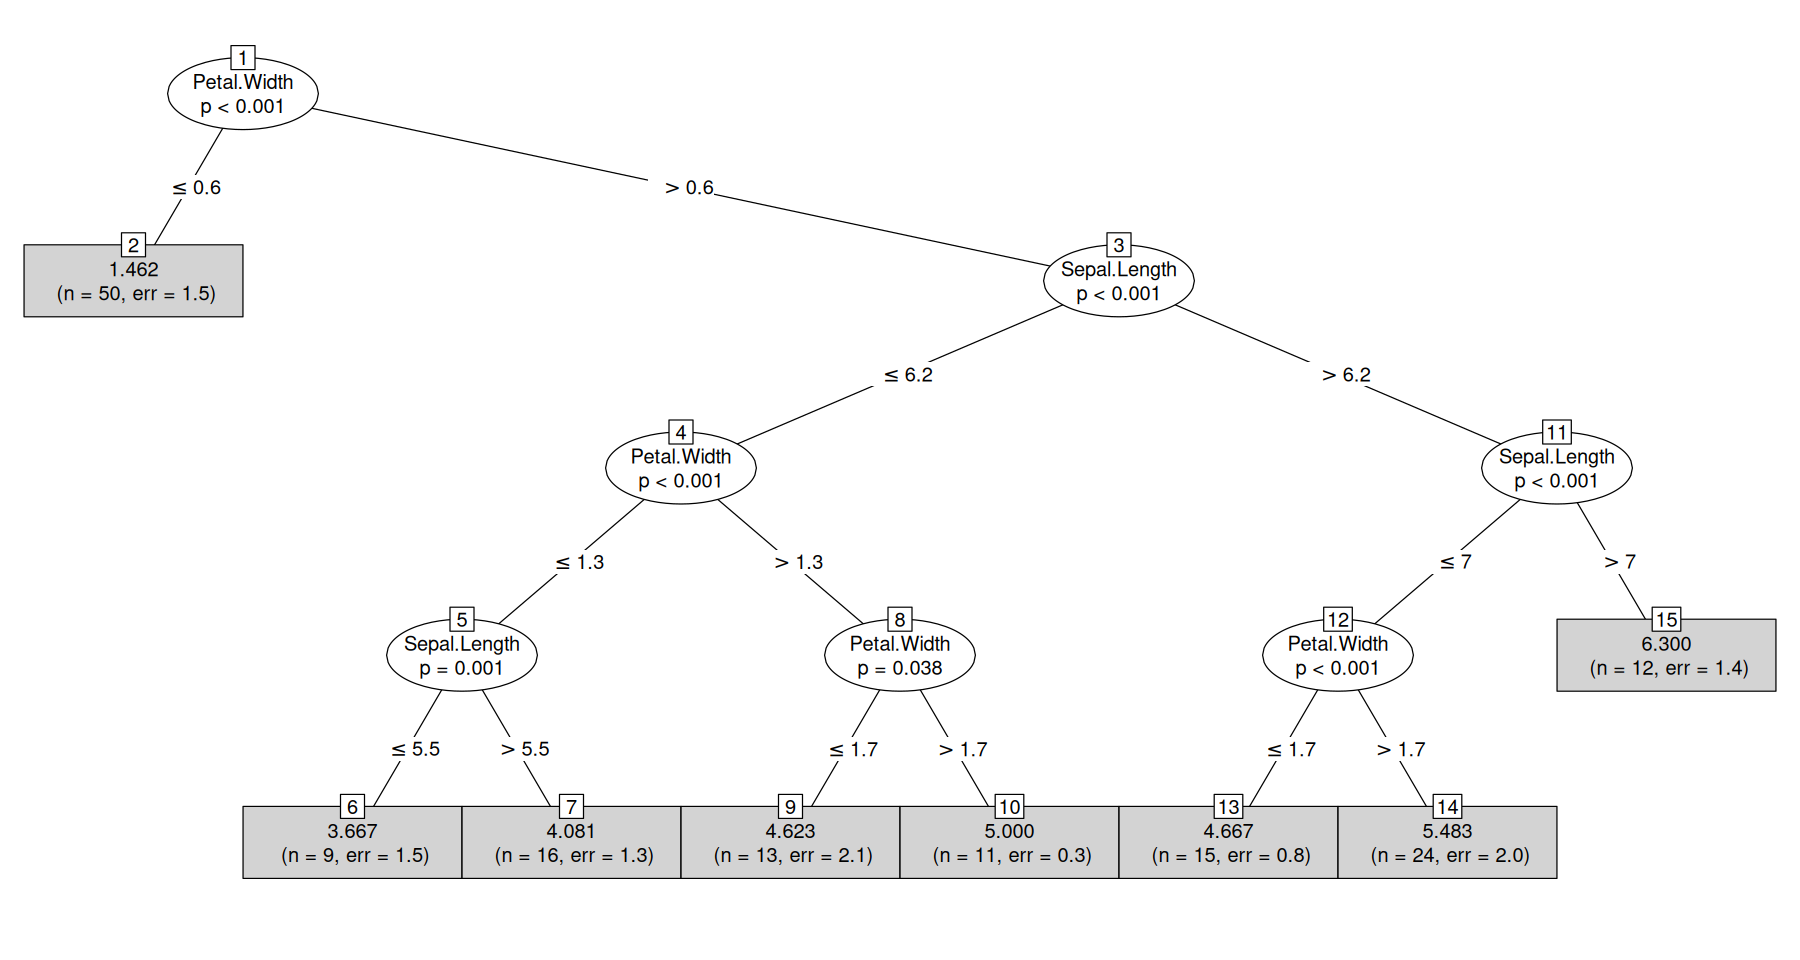

In [13]:
# Set plot size in Jupyter Notebook (15 x 8 inches)
options(repr.plot.width = 15, repr.plot.height = 8)
# Plot the regression tree
plot(reg_tree,type="simple")

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 1</span><br/><br/>

  1) Load the <code>demographic_data.csv</code> file and store it in a variable named <code>demographic_data</code> (use `stringsAsFactors = TRUE` to be sure to have correct format).<br/><br/>

  2) Each row in the dataset represents an individual, with columns indicating characteristics such as `married`, `has_a_job`, `has_children`, etc. <br/>Use a decision tree model to predict whether a person has a car (`has_car` column) based on the following predictor variables: `owns_house`, `has_a_job`, `married`, and     `has_children`.

  3) Plot the decision tree<br/><br/>
</div>

In [39]:
# 1) Read the CSV file into a dataframe named demographic_data (hint: use read.csv())
demographic_data <- ____("demographic_data.csv", stringsAsFactors = TRUE)



<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> demographic_data <- <span style="color:blue;">read.csv</span>("demographic_data.csv", stringsAsFactors = TRUE) </code><br/>
  </div>
</details>


In [42]:
# 2) Use a decision tree model to predict whether a person has a car (has_car column) 
#based on the following predictor variables: owns_house, has_a_job, married, and has_children.

demographic_data_ct <- ____(____ ~ owns_house + has_job + married + has_children, data = ___) #fill the blanks
demographic_data_ct


Model formula:
has_car ~ owns_house + has_job + married + has_children

Fitted party:
[1] root
|   [2] owns_house in No
|   |   [3] has_job in No: No (n = 26, err = 19.2%)
|   |   [4] has_job in Yes: Yes (n = 77, err = 31.2%)
|   [5] owns_house in Yes: Yes (n = 97, err = 10.3%)

Number of inner nodes:    2
Number of terminal nodes: 3


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> demographic_data_ct <- <span style="color:blue;">ctree</span>(<span style="color:blue;">has_car</span> ~ owns_house + has_job + married + has_children, data = <span style="color:blue;">demographic_data</span>) </code><br/>
  </div>
</details>


In [ ]:
# 3) plot the decision tree

___(demographic_data_ct)

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code><span style="color:blue;">plot</span>(demographic_data_ct)</code><br/>
    <img src="images/Script4_Q2.png" alt="Script4_Q2" style="max-width:100%; margin-top:10px;">
  </div>
</details>


# 3 Confusion/Error Matrix -> *table(predict(ctree_object),df$col)*

<div style="display: flex; align-items: center; justify-content: space-between;border: 5px solid darkgreen;padding: 15px; ">
  <div style="width: 70%;">
    <p><strong>The confusion matrix</strong> is a tool used to evaluate the performance of a classification model. It compares the predicted labels with the actual labels and helps identify the types of errors made by the model. It includes four main components:</p>
    <ul>
      <li><strong>True Positives (TP)</strong>: cases that are actually positive and correctly predicted as positive.</li>
      <li><strong>True Negatives (TN)</strong>: cases that are actually negative and correctly predicted as negative.</li>
      <li><strong>False Positives (FP)</strong>: cases that are actually negative but incorrectly predicted as positive.</li>
      <li><strong>False Negatives (FN)</strong>: cases that are actually positive but incorrectly predicted as negative.</li>
    </ul>
    <p>These components are used to calculate key evaluation metrics such as <strong>accuracy</strong>, <strong>precision</strong>, <strong>recall</strong>, and <strong>F1-score</strong>.</p>
  </div>

  <div style="width: 35%; margin-left: 20px;">
    <img src="images/Confusion Matrix.png" alt="Confusion Matrix" style="width: 100%;">
  </div>
</div>


## 3.1 Confusion Matrix  -> *table(predict(ctree_object),df$col)*

`table(predict(model), df$col)`

- create a **confusion matrix**, which compares the predictions made by a classification model to the actual class labs.

**Components**:
- `model`: a trained classification model (e.g., decision tree, SVM).
- `predict(model)`: generates the predicted class labels from the model.
- `df$col`: the actual (true) class labels from the dataset we want to predict
- `table(...)`: creates a cross-tabulation (confusion matrix) counting how often each prediction matches or differs from the true class.

**Result**:
The output is a **confusion matrix** where:
- **Rows** = predicted classes  
- **Columns** = actual classes  
- Each cell `[i, j]` = number of observations predicted as class *i* but actually belonging to class *j*.

### 3.1.1 Example with the classification tree of the Iris Species

<div style="display: flex; justify-content: flex-end;">
    <img src="images/Error Matrix.png" width="35%">
</div>

In [13]:
# confusion matrix
table(predict(irisct), iris$Species)

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         49         5
  virginica       0          1        45

In [14]:
# confusion matrix
table(predict(irisct2), iris$Species)

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         49         5
  virginica       0          1        45

<div style="padding: 10px; border:1px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 2</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        Here is an example of a confusion matrix derived from a decision tree to predict fishes species. <br/><br/><br/><br/>
        <strong>Which statements are correct? </strong>
    </div>
    <div style="margin-left: 20px;">
      <img src="images/Script4_Q1.png" alt="Skewed distribution" style="max-width: 500px; height: auto; border: 1px solid #ccc;" />
    </div>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) The decision tree perfectly predicted species 2 and never made a mistake when identifying it.</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) There was one instance where the true class was species 1, but the decision tree labeled it as species 3.</label><br/>
  <label><input type="radio" name="q5" value="3"> 3) The decision tree correctly classified all samples that truly belonged to species 3.</label><br/>
</form>


</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 1) The decision tree perfectly predicted species 2 and never made a mistake when identifying it.</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 2) There was one instance where the true class was species 1, but the decision tree labeled it as species 3.</label><br/>
  <label><input type="radio" name="q5" value="3"> 3) The decision tree correctly classified all samples that truly belonged to species 3.</label><br/>
</form>

  </div>
</details>


# 4. Predict Outputs Using a Classification Tree -> *predict(ctree_object, newdata=new_sample)*

**Create a new data frame with feature values for the new sample**

- **new_sample** <- data.frame(
  *Feature1 = value1*,
  *Feature2 = value2*,
  *Feature3 = value3*,
  *Feature4 = value4*
)

**Predict the class using the trained model**

- **prediction** <- predict(model, newdata = new_sample)


<div style="border: 5px solid darkgreen; padding: 15px; border-radius: 0px;">
  <img src="images/newiris1.png" alt="Image 1" style="width: 45%;">
  <img src="images/newiris2.png" alt="Image 2" style="width: 45%;">
</div>


## 4.1 Predict iris species with previous classification tree

In [15]:
#predict for new iris specimen:
new.iris1<-data.frame(Sepal.Length=4.7,Sepal.Width=3.4,Petal.Length=1.8,Petal.Width=0.2)
predict(irisct, newdata=new.iris1)

new.iris2<-data.frame(Sepal.Length=5.7,Sepal.Width=2.6,Petal.Length=4.1,Petal.Width=1.3)
predict(irisct, newdata=new.iris2)

1 
setosa 
Levels: setosa versicolor virginica

1 
versicolor 
Levels: setosa versicolor virginica

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 3</span><br/><br/>

  1) Load the <code>demographic_data.csv</code> file and store it in a variable named <code>demographic_data</code> (use `stringsAsFactors = TRUE` to be sure to have the correct format).<br/>

  2) Use a decision tree model to predict whether a person has a car (`has_car` column) based on the following predictor variables: `owns_house`, `has_a_job`, `married`, and     `has_children`.

  3) Create a new sample called "John", John is supposed to : <br/>
    <ul>
      <li>Own a house</li>
      <li>Have a job</li>
      <li>Not be married</li>
      <li>Have no children</li>
    </ul>
    <br/>
4) Predict if John has a car or not
</div>

In [ ]:
# 1) Read the CSV file into a dataframe named demographic_data (hint: use read.csv())
demographic_data <- ____("demographic_data.csv", stringsAsFactors = TRUE)



<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> demographic_data <- <span style="color:blue;">read.csv</span>("demographic_data.csv", stringsAsFactors = TRUE) </code><br/>
  </div>
</details>

In [ ]:
# 2) Use a decision tree model to predict whether a person has a car (has_car column) 
#based on the following predictor variables: owns_house, has_a_job, married, and has_children.

demographic_data_ct <- ____(____ ~ owns_house + has_job + married + has_children, data = ___) #fill the blanks
demographic_data_ct


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> demographic_data_ct <- <span style="color:blue;">ctree</span>(<span style="color:blue;">has_car</span> ~ owns_house + has_job + married + has_children, data = <span style="color:blue;">demographic_data</span>) </code><br/>
  </div>
</details>


In [5]:
# 3) Create a new sample called "John"
        #Own a house
        #Have a job
        #Not be married
        #Have no children

John<-data.frame(owns_house="___",has_job="___",married="___",has_children="___")
John


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> John<-data.frame(owns_house= <span style="color:blue;">"Yes"</span>,has_job= <span style="color:blue;">"Yes"</span>, married = <span style="color:blue;">"No"</span>, has_children = <span style="color:blue;">"No"</span>) </code><br/>
        <img src="images/Script4_Q3.png" alt="Script4_Q" style="max-width:100%; margin-top:10px;">
  </div>
</details>


In [ ]:
# 4) Predict if John has a car or not
predict(______, newdata=___)


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">4) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> predict(<span style="color:blue;">demographic_data_ct</span>,newdata = <span style="color:blue;">John</span>)</code><br/>
        <img src="images/Script4_Q3_1.png" alt="Script4_Q3_1" style="max-width:100%; margin-top:10px;">
  </div>
</details>


# 5. Random Forest -> *randomforest()*

<div style="border: 5px solid darkgreen; padding: 15px; border-radius: 0px;">
    <img src="images/Random Forest.png" width="55%">
</div>

## 5.1 Building a Random Forest -> *randomForest(response ~ predictors, data = df, ntree =, mtry =, importance = TRUE, na.action = na.omit, do.trace = , proximity = T)*

- **response ~ predictors** → *Formula specifying the target (response) variable and the explanatory (predictor) variables*  
  *(use `response ~ .` to include all predictors in the dataset)*  
- **df** → *Data frame containing both the response and predictor variables*
- **ntree** → *Number of trees to grow (e.g., 500)*
- **mtry** → *Number of variables randomly sampled at each split*
- **importance = TRUE** → *Computes variable importance*
- **proximity = T** → *Computes proximity matrix*
- **na.action = na.omit** → *Excludes rows with missing values*

**Ouputs** :

- **Type of random forest**: *classification*
- **Number of trees (`ntree`)**: *ntree*
- **Number of variables tired at each split** : *mtry*
- **Out-of-bag (OOB) error estimate**: *OOB estimated*
- **confusion matrix**


In [52]:
# Build a Random Forest to predict Species based on all four features (petal length, petal width, sepal length, sepal width)

iris_rf <- randomForest(Species ~ Petal.Length + Petal.Width + Sepal.Length + Sepal.Width,
                        data = iris,
                        ntree = 500,          # Number of trees
                        mtry = 2,             # Number of variables tried at each split
                        importance = TRUE,    # Compute variable importance
                        proximity = TRUE)     # Compute proximity matrix

# Display a summary of the Random Forest model
print(iris_rf)


Call:
 randomForest(formula = Species ~ Petal.Length + Petal.Width +      Sepal.Length + Sepal.Width, data = iris, ntree = 500, mtry = 2,      importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          3        47        0.06


## 5.2 Plotting Random Forest performances -> *plot(rf)*
- On **x-axis** : *number of trees*

- On **y-axis** : *error rates*

- **Black curve** : *overall out-of-bag (OOB)* error rate.

- **Colored curves** : *error rates for each individual class* (species).

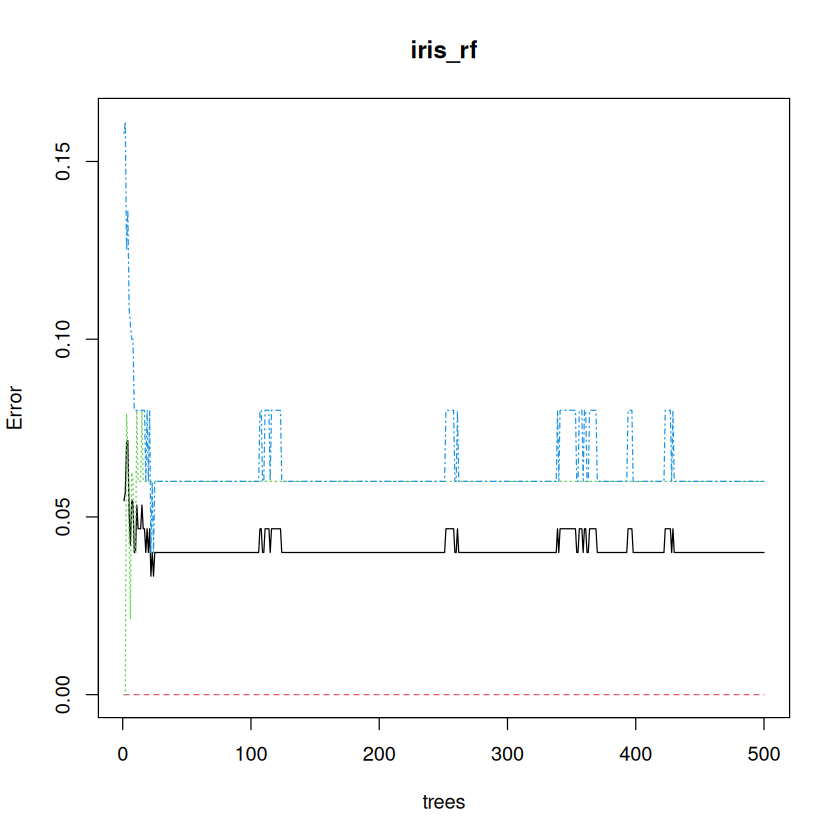

In [53]:
# Plot the model's error rate over number of trees
plot(iris_rf)

## 5.3 Display variable importance -> *importance(rf)*

- **Rows** : *Each row corresponds to one predictor variable used in the Random Forest model* 
- **First Columns** : *Importance scores of the variable specifically for predicting each species class.*
- **`MeanDecreaseAccuracy/%IncMSE`** : *Overall decrease in model accuracy if that variable is permuted (i.e., randomly shuffled). A higher value means the variable has a larger impact on prediction accuracy.*
- **`MeanDecreaseGini/IncNodePurity`** : *Total decrease in node impurity (Gini index) contributed by splits on that variable across all trees. Higher values indicate the variable contributes more to creating pure (homogeneous) nodes*

In [64]:
# Display variable importance
importance(iris_rf)

,setosa,versicolor,virginica,MeanDecreaseAccuracy,MeanDecreaseGini
Petal.Length,22.576688,33.500534,28.539869,34.094593,43.081489
Petal.Width,21.659990,30.196175,30.661227,31.916806,43.349946
Sepal.Length,6.862572,7.997811,8.744979,11.661939,10.443642
Sepal.Width,4.606050,2.917506,4.170143,5.920288,2.398381


## 5.4 plot variable importance -> *varImpPlot(rf)*

- **MeanDecreaseAccuracy Plot** : *Shows the Mean Decrease Accuracy (on x-axis) for each variable*
- **MeanDecreaseGini Plot** : *Shows the Mean Decrease Gini index (on x-axis) for each variable*

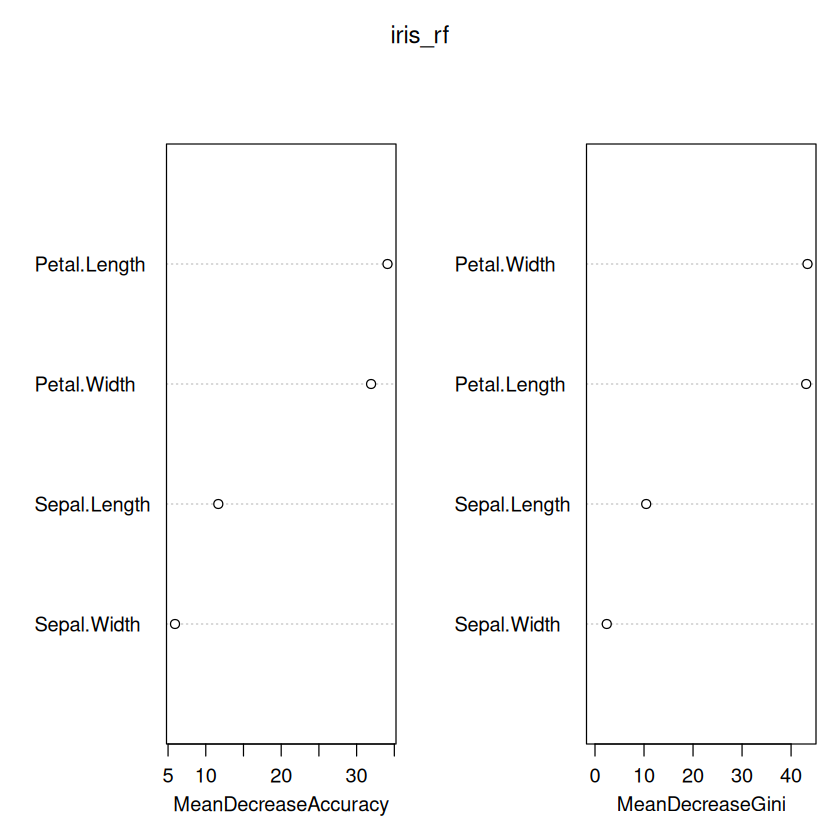

In [67]:
# Optional: Plot variable importance
varImpPlot(iris_rf)

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 4</span><br/><br/>

  1) Load the <code>demographic_data.csv</code> file and store it in a variable named <code>demographic_data</code> (use `stringsAsFactors = TRUE` to be sure to have correct format).<br/><br/>

  2) Use a random forest model to predict whether a person lives in town (`live_in_town` column) based on all other variables and shows the output. Use 500 trees, and 2  variables randomly sampled at each split, let  <code> importance = TRUE </code> and <code>proximity = TRUE</code> and show the result

3) Which variable is the more important according to the <strong>MeanDecreaseAccuracy</strong>

</div>

In [ ]:
# 1) Read the CSV file into a dataframe named demographic_data (hint: use read.csv())
demographic_data <- ____("demographic_data.csv", stringsAsFactors = TRUE)



<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> demographic_data <- <span style="color:blue;">read.csv</span>("demographic_data.csv", stringsAsFactors = TRUE) </code><br/>
  </div>
</details>

In [6]:
#2) Use a random forest model to predict whether a person lives in town (live_in_town column) based on all other variables

# Use 500 trees,
# 2 variables randomly sampled at each split

demographic_data_rf <- ___(___ ~ ___, # hint (use randomForest, live_in_town and when using all variable as predictors juste use "~.")
                        data = ___,      # hint (use demographic_data )
                        ntree = ___,                  # Number of trees # hint (use 500 trees)
                        mtry = ___,                     # Number of variables tried at each split (use 2 varaibles randomly sampled at each split)
                        importance = ___,            # Compute variable importance 
                        proximity = ___)             # Compute proximity matrix


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> demographic_data_rf <- <span style="color:blue;">randomForest</span>(<span style="color:blue;">live_in_town</span> ~ <span style="color:blue;">.</span>, 
        data = <span style="color:blue;">demographic_data</span>,
        ntree = <span style="color:blue;">500</span>,
        mtry = <span style="color:blue;">2</span>,
        importance = <span style="color:blue;">TRUE</span>,
        proximity = <span style="color:blue;">TRUE</span>
    </code><br/>
  </div>
</details>


In [ ]:
# 3) Which variable is the more important according to the MeanDecreaseAccuracy to predict if a person lives in town ?
______(demographic_data_rf)


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> <span style="color:blue;">importance</span>(demographic_data_rf) </code><br/>
      <img src="images/Script4Q4.png" alt="Script4_Q" style="max-width:40%; margin-top:10px;">
  </div>
</details>

# 6. Partial Dependance Plots -> *partialPlot()*

## 6.1 Partial Dependence Plots → *partialPlot(model, data, variable)*

- **model** → *A trained random forest model object*  
- **data** → *Data frame used to train the model*  
- **variable** → *Name of the predictor variable for which to plot the partial dependence*  

**Outputs** :

- **X-axis** : Values of the selected predictor variable (the variable specified in the `variable` argument).  
- **Y-axis** : Estimated partial dependence — the average predicted response of the model when the predictor variable takes those values, marginalizing over the other variables.

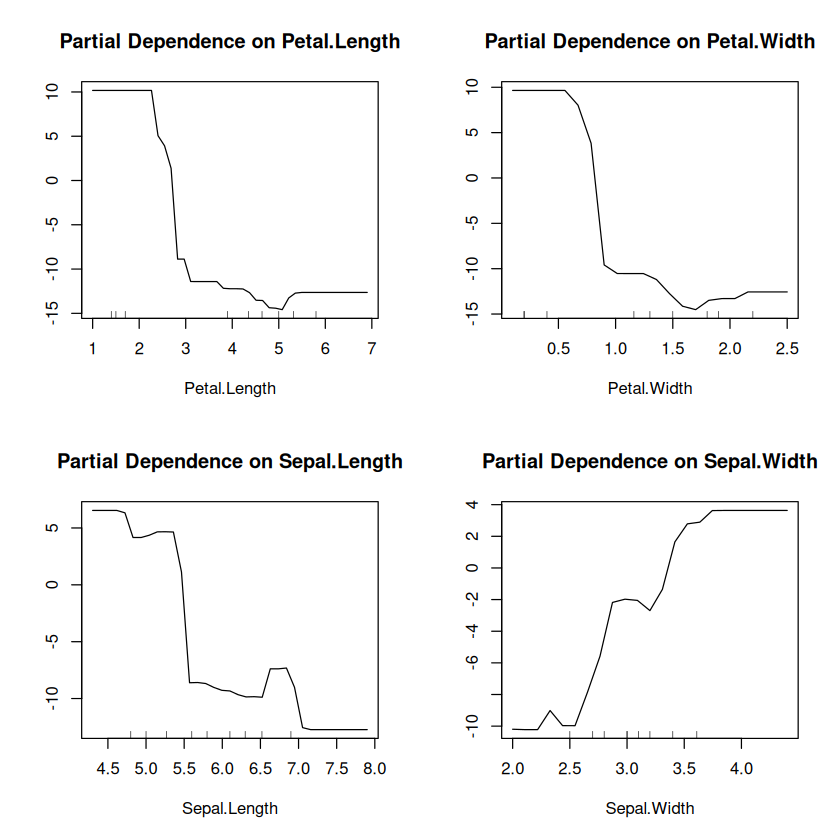

In [57]:
# Partial dependence plots for selected predictors
par(mfrow = c(2, 2))  # Arrange plots in 2 rows x 2 cols

partialPlot(iris_rf, iris, Petal.Length, main = "Partial Dependence on Petal.Length")
partialPlot(iris_rf, iris, Petal.Width, main = "Partial Dependence on Petal.Width")
partialPlot(iris_rf, iris, Sepal.Length, main = "Partial Dependence on Sepal.Length")
partialPlot(iris_rf, iris, Sepal.Width, main = "Partial Dependence on Sepal.Width")

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 4</span><br/><br/>

  1) Load the <code>stress_dataset.csv</code> file and store it in a variable named <code>stress_dataset</code>, This dataset captures real-life vibes from students—their nightly sleep hours, daily coffee intake, average grades, days left before exams, and other lifestyle stats <br/><br/>

  2) Use a random forest model to predict the level of stress of a student(`stress_level` column) based on all other variables and shows the output. Use 500 trees, and 2  variables randomly sampled at each split, let  <code> importance = TRUE </code> and <code>proximity = TRUE</code> and show the result

3) Which variable is the more important according to the <strong>MeanDecreaseAccuracy</strong>

4) Generate and display the partial dependence plot for the predicted `stress_level` to visualize the effect of the most important variable on stress.

</div>

In [13]:
# 1) Read the CSV file into a dataframe named stress_dataset (hint: use read.csv())
stress_dataset<- read.csv("stress_dataset.csv")


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> stress_dataset <- <span style="color:blue;">read.csv</span>("stress_dataset.csv") </code><br/>
  </div>
</details>

In [15]:
#2) Use a random forest model to predict the level of stress of a student( (stress_level column) based on all other variables

# Use 500 trees,
# 2 variables randomly sampled at each split

stress_dataset_rf <- randomForest(stress_level ~ ., # hint (use randomForest, live_in_town and when using all variable as predictors juste use "~.")
                        data = stress_dataset,      # hint (use demographic_data )
                        ntree = 500,                  # Number of trees # hint (use 500 trees)
                        mtry = 2,                     # Number of variables tried at each split (use 2 varaibles randomly sampled at each split)
                        importance = TRUE,            # Compute variable importance 
                        proximity = TRUE)             # Compute proximity matrix


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> stress_dataset_rf <- <span style="color:blue;">randomForest</span>(<span style="color:blue;">stress_level</span> ~ <span style="color:blue;">.</span>, 
        data = <span style="color:blue;">stress_dataset</span>,
        ntree = <span style="color:blue;">500</span>,
        mtry = <span style="color:blue;">2</span>,
        importance = <span style="color:blue;">TRUE</span>,
        proximity = <span style="color:blue;">TRUE</span>
    </code><br/>
  </div>
</details>


In [ ]:
# 3) Which variable is the more important according to the MeanDecreaseAccuracy to predict the stress level of a student ?
___(stress_dataset_rf)


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> <span style="color:blue;">importance</span>(stress_dataset_rf) </code><br/>
      <img src="images/Script4_Q5.png" alt="Script4_Q" style="max-width:25%; margin-top:10px;">
  </div>
</details>

In [ ]:
# 4) Generate and display the partial dependence plot for the predicted stress_level 
     #to visualize the effect of the most important variable on stress

# Get all column names, then remove the target variable "stress_level"
predictors <- names(stress_dataset)
predictors <- predictors[predictors != "stress_level"]

# Set the plotting layout: 4 rows and 3 columns
par(mfrow = c(4, 3))  # 4x3 grid 

# Set plot size in Jupyter Notebook (20 x 14 inches)
options(repr.plot.width = 20, repr.plot.height = 14)

# Define a vector of colors to use
colors <- c("darkred", "steelblue", "forestgreen", "purple", "orange", "gold", "deeppink", "cyan", "brown")
i <- 0

# Loop through each predictor and generate its Partial Dependence Plot (PDP)
for (predictor in predictors) {
   i = i+ 1
    
  ___(___, # hint : use the random forest model
              ___,  # hint : use the corresponding dataset
              as.character(___),  # hint use predictor
              main = paste("Effect of", as.character(predictor)),
              xlab = as.character(predictor),
              ylab = "Predicted Stress Level",
             col = colors[i])
}


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">4) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> <span style="color:blue;">partialPlot</span>(<span style="color:blue;">stress_dataset_rf</span>, 
        <span style="color:blue;">stress_dataset</span>,
        as.character(<span style="color:blue;">predictor</span>),
        main = paste("Effect of", as.character(predictor)),
        xlab = as.character(predictor),
        ylab = "Predicted Stress Level",
        col = colors[i])
    </code><br/>
      <img src="images/Script4_Q5_1.png" alt="Script4_Q" style="max-width:100%; margin-top:10px;">
  </div>
</details>


# 7. Cut dendrograms to form clusters -> *cutree()*

**Cut the hierarchical clustering tree into k clusters**

clusters <- **cutree**( *hc*, k = *number_of_clusters*) 

- **hc** = *hierarchical clustering object* (result of hclust)
- **number_of_clusters** = *Number of clusters to cut the dendrogram into*

# Question 6 

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 6</span><br/><br/>

  1) Remove empty site for the `spe`, `env`, `spa` , `latlong` dataset <br/><br/>

  2) Compute the matric of chord distance among sites (on the `spe` dataset)

3) Perform a hierarchicalagglomerative clustering with Ward's minimum variance

4) Convert the dendogram as spe.cw using  `as.dendogram()`

5) Plot the dendogram with specific colors using

</div>

## 1 Remove empty site 8

In [18]:
# Remove empty site 8
spe <- spe[-8, ]
env <- env[-8, ]
spa <- spa[-8, ]
latlong <- latlong[-8, ]

## 2 EXERCISE : Compute the matrix of chord distance among sites 

<div style="display: flex; justify-content: space-around;">
    <img src="images/chord distance.png" width="25%">
</div>

In [ ]:
# 1. Normalize the data
spe.norm <- decostand(_____, "_____")  # Hint: input data, method = "normalize"

# 2. Calculate the distance matrix
spe.ch <- vegdist(_____, "_____")      # Hint: normalized data, distance method = "euc"

## 3 EXERCISE : Hierarchical agglomerative clustering with Ward's minimum variance clustering

In [ ]:
# 1. Perform hierarchical clustering
hc <- hclust(_____, method = "_____")  # Hint: distance matrix, clustering method = "ward.D2"

# 2. Convert to dendrogram
spe.cw <- as.dendrogram(_____)         # Hint: object returned by hclust

# 3. Plot dendrogram
plot(spe.cw)                         


## 4 EXERCISE : Partitioning dendograms into 4 groups

In [ ]:
# Partition the dendrogram into 4 groups
spe.cw.g <- cutree(_____, _____)  # Hint: dendrogram object, number of clusters

## 5 Plot the dendogram with specific colors for each cluster 

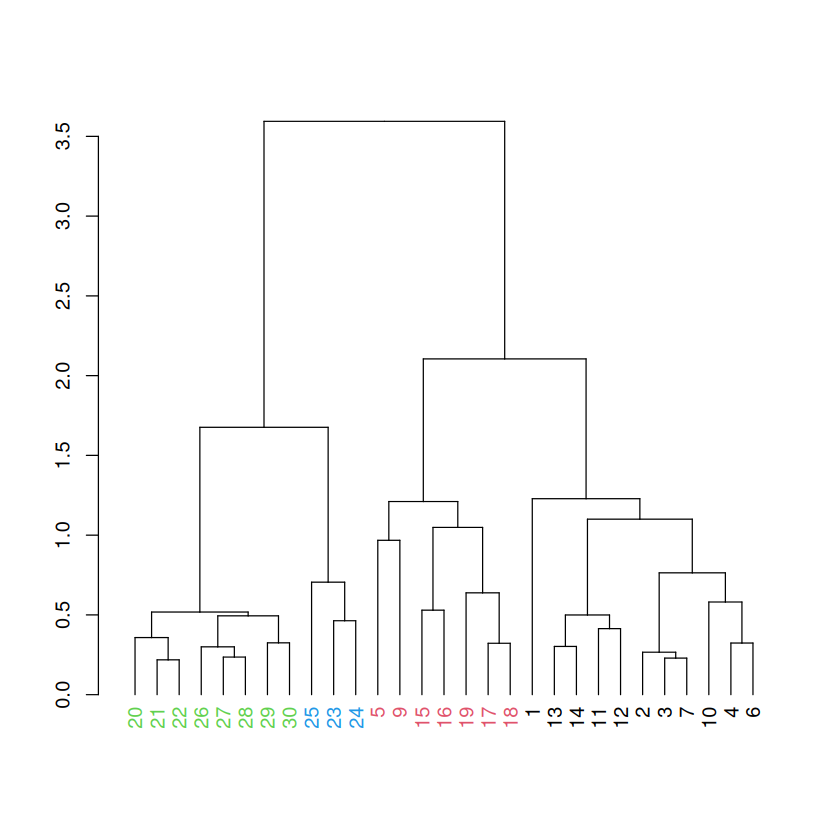

In [28]:
colors_to_use <- spe.cw.g      #define colors and sort according to tips in dendrogram
colors_to_use<-colors_to_use[order.dendrogram(spe.cw)]
labels_colors(spe.cw) <- colors_to_use   #change color of tip labels depending on best partition
plot(spe.cw)

## 6 Display geographical distribution for each cluster 

,spe.cw.g,dfs,ele,slo,dis,pH,har,pho,nit,amm,⋯,Titi,Abbr,Icme,Gyce,Ruru,Blbj,Alal,Anan,X,Y
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1,0.3,934,48.0,0.84,7.9,45,0.01,0.20,0.00,⋯,0,0,0,0,0,0,0,0,85.678,20.000
2,1,2.2,932,3.0,1.00,8.0,40,0.02,0.20,0.10,⋯,0,0,0,0,0,0,0,0,84.955,20.100
3,1,10.2,914,3.7,1.80,8.3,52,0.05,0.22,0.05,⋯,0,0,0,0,0,0,0,0,92.301,23.796
4,1,18.5,854,3.2,2.53,8.0,72,0.10,0.21,0.00,⋯,1,0,0,0,0,0,0,0,91.280,26.431
5,2,21.5,849,2.3,2.64,8.1,84,0.38,0.52,0.20,⋯,3,0,0,0,5,0,0,0,92.005,29.163
6,1,32.4,846,3.2,2.86,7.9,60,0.20,0.15,0.00,⋯,2,0,0,0,1,0,0,0,95.954,36.315


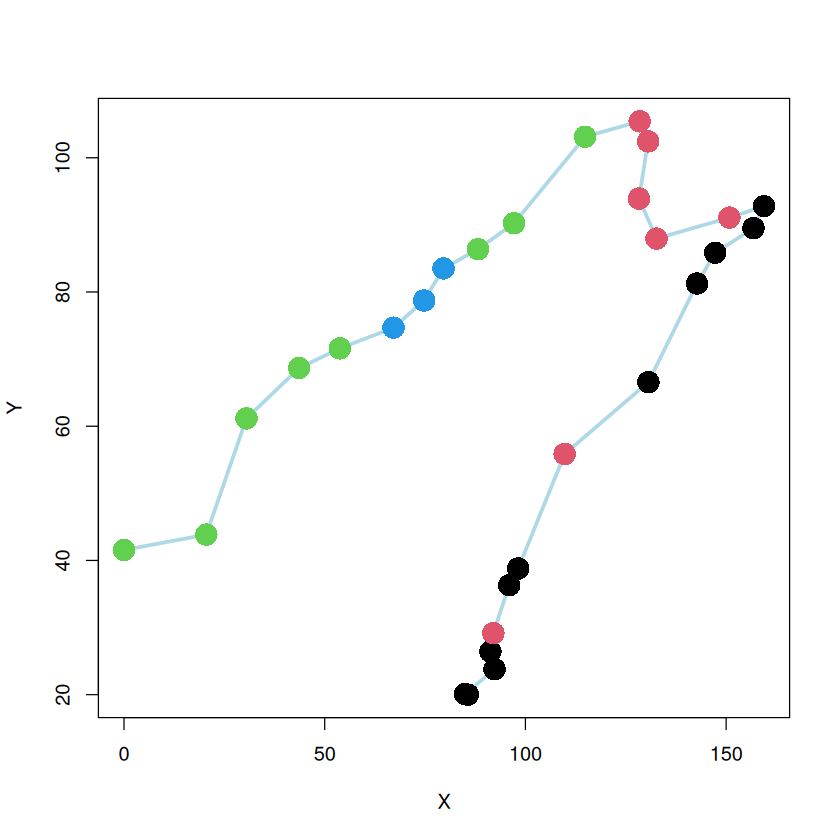

In [29]:
#combining all data
all.dat<-cbind(spe.cw.g,env,spe, spa)
#spatial distribution of sample groups
plot(spa, type="l",col="lightblue",lwd=3)
points(all.dat$X,all.dat$Y,pch=16, cex=2.5, col=all.dat$spe.cw.g, xlab="X coordinate", ylab="Y coordinate")


## 7. EXERCISE: Build a Classification Tree

- Create a classification tree where the response variable is the cluster group (`spe.cw.g`) and the predictors are the environmental variables (`ele + slo + dis + pH + har + pho + nit + amm + oxy`) using the dataframe `all.dat`.


In [30]:
# Convert cluster groups to factor (response variable)
response <- as.factor(_____)           # Hint: cluster group vector (spe.cw.g)

# Build classification tree model
Classification_Tree <- ctree(____~ ele + slo + dis + pH + har + pho + nit + amm + oxy, data = _____)  # Hint: response variable, data frame name

# Plot the classification tree
plot(_____)                           # Hint: classification tree object


ERROR: Error in parse(text = x, srcfile = src): <text>:2:24: unexpected input
1: # Convert cluster groups to factor (response variable)
2: response <- as.factor(__
                          ^


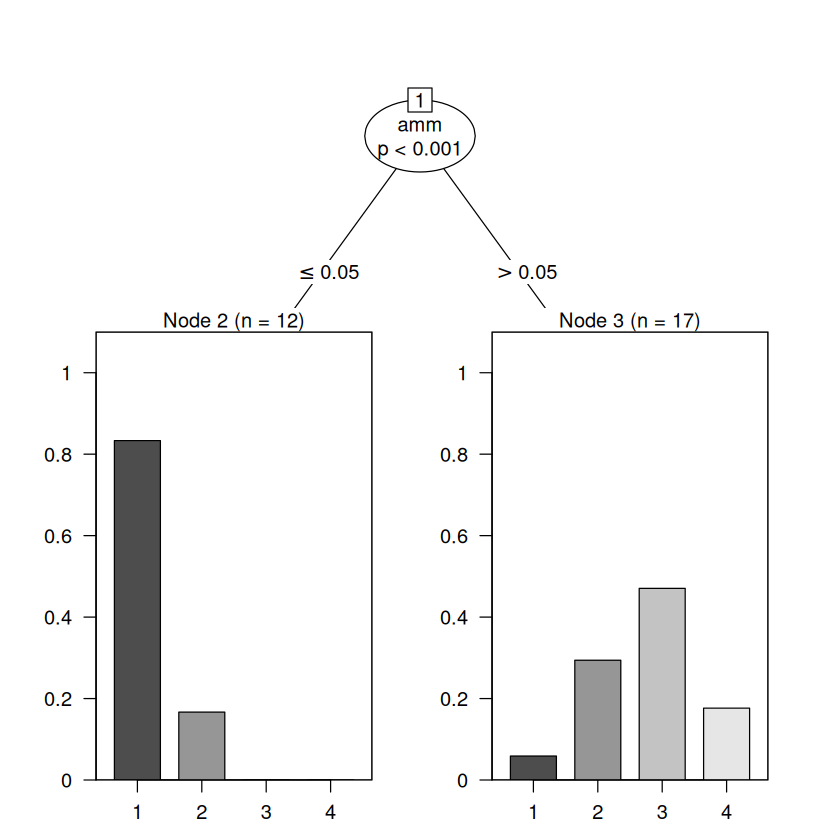

In [32]:
# Plot the classification tree
plot(Classification_Tree)


## 8. Visualize spatial distribution of samples and clusters

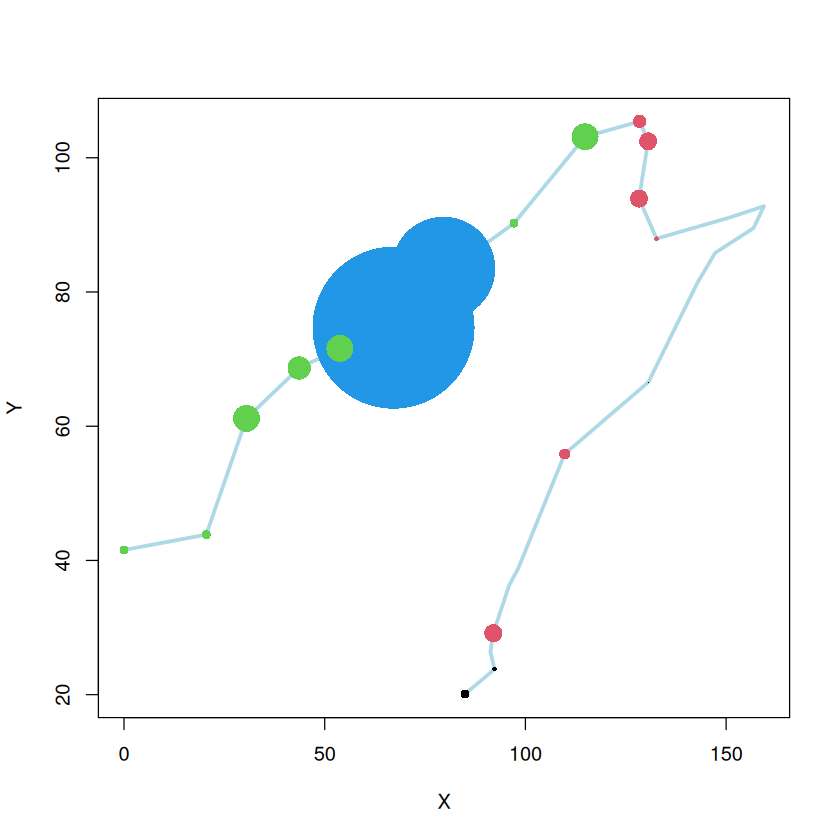

In [33]:
plot(spa, type = "l", col = "lightblue", lwd = 3)  # Plot the spatial outline
points(all.dat$X, all.dat$Y, 
       pch = 16, 
       cex = all.dat$amm * 10,          # Point size scaled by ammonium concentration
       col = all.dat$spe.cw.g,          # Point color based on cluster group
       xlab = "X coordinate", 
       ylab = "Y coordinate")

## 9. EXERCISE: Build a Regression Tree

- Apply the same logic as in the previous exercise, but this time generate a **regression tree** where the **response variable** is `bod` (a quantitative variable), and the **predictors** are the environmental variables:  
  `ele + slo + dis + pH + har + pho + nit + amm + oxy`, using the dataframe `all.dat`.

In [35]:
# Build regression tree model
Regression_Tree <- ctree(bod ~ ele + slo + dis + pH + har + pho + nit + amm + oxy, data = _____)  # Hint: data frame name

# Plot the regression tree
plot(_____)                           # Hint: regression tree object


ERROR: Error in parse(text = x, srcfile = src): <text>:2:92: unexpected input
1: # Build regression tree model
2: Regression_Tree <- ctree(bod ~ ele + slo + dis + pH + har + pho + nit + amm + oxy, data = __
                                                                                              ^


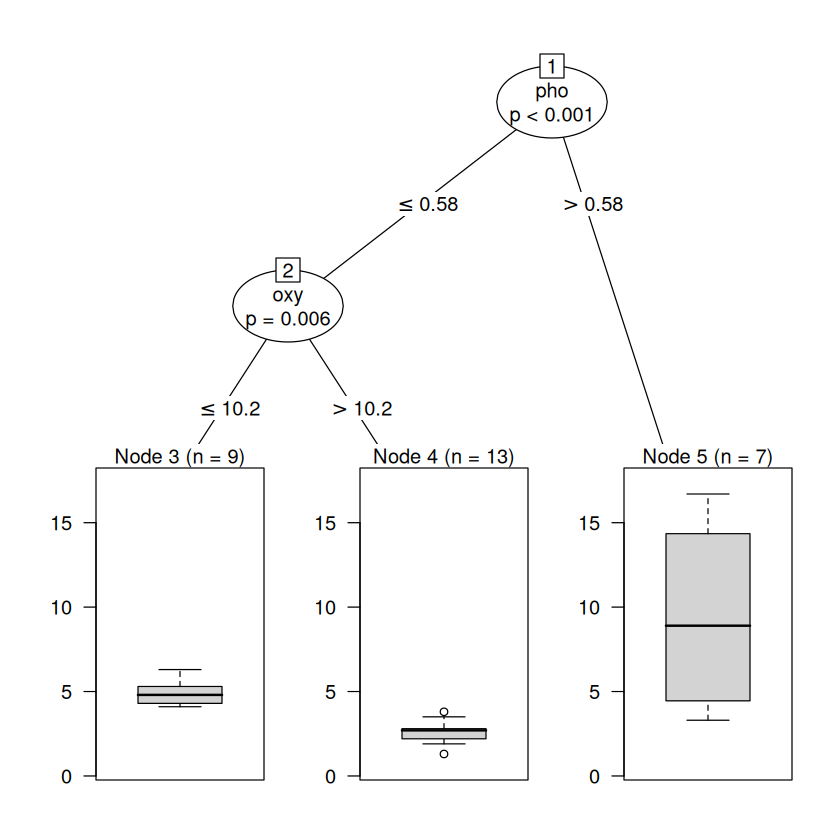

In [36]:
# Build regression tree model
Regression_Tree <- ctree(bod ~ ele + slo + dis + pH + har + pho + nit + amm + oxy, data = all.dat)

# Plot the regression tree
plot(Regression_Tree)


# HOMEWORK: Model Fish Community Metrics Using Regression Trees

- **Task 1**: Calculate **species richness** (number of species per site).
- **Task 2**: Calculate **Shannon diversity index** for each site.
- **Task 3**: Build a **regression tree** to predict **species richness** using environmental variables.
- **Task 4**: Build a **regression tree** to predict **Shannon diversity** using the same predictors.


In [ ]:
# Task 1: Calculate species richness (number of species per sample)

all.dat$spec.rich <- rowSums(____ > 0)  # Hint: Replace ____ with the species abundance matrix name

In [ ]:
# Task 2: Calculate Shannon diversity index

all.dat$H <- diversity(____, index = "shannon")  # Hint: Replace ____ with the species abundance matrix name

### Self-control of the `all.dat` dataset

- Run the cell below; you should get the same output as the figure below


<div style="display: flex; justify-content: flex-end;">
    <img src="images/head_all_dat.png" width="15%">
</div>

In [45]:
# self-control of the all-dat dataset
head(all.dat)

,spe.cw.g,dfs,ele,slo,dis,pH,har,pho,nit,amm,⋯,Icme,Gyce,Ruru,Blbj,Alal,Anan,X,Y,spec.rich,H
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.3,934,48.0,0.84,7.9,45,0.01,0.20,0.00,⋯,0,0,0,0,0,0,85.678,20.000,1,0.000000
2,1,2.2,932,3.0,1.00,8.0,40,0.02,0.20,0.10,⋯,0,0,0,0,0,0,84.955,20.100,3,1.077556
3,1,10.2,914,3.7,1.80,8.3,52,0.05,0.22,0.05,⋯,0,0,0,0,0,0,92.301,23.796,4,1.263741
4,1,18.5,854,3.2,2.53,8.0,72,0.10,0.21,0.00,⋯,0,0,0,0,0,0,91.280,26.431,8,1.882039
5,2,21.5,849,2.3,2.64,8.1,84,0.38,0.52,0.20,⋯,0,0,5,0,0,0,92.005,29.163,11,2.329070
6,1,32.4,846,3.2,2.86,7.9,60,0.20,0.15,0.00,⋯,0,0,1,0,0,0,95.954,36.315,10,2.108294


In [ ]:
# Task 3: Build a Regression Tree to Predict Species Richness

# Build the regression tree
regression_tree_richness <- ctree(____ ~ ele + slo + dis + pH + har + pho + nit + amm + oxy, data = ____)
# Hint 1: response variable = species richness column  
# Hint 2: dataframe name = dataset containing both response and predictors

# Plot the regression tree
plot(____)
# Hint: tree object created above


In [ ]:
# Task 4: Build a Regression Tree to Predict Shannon Diversity

# Build the regression tree
regression_tree_diversity <- ctree(____ ~ ele + slo + dis + pH + har + pho + nit + amm + oxy, data = ____)
# Hint 1: response variable = column containing Shannon diversity values  
# Hint 2: dataframe name = dataset containing both response and predictors

# Plot the regression tree
plot(____)
# Hint: tree object created above


# Example of Random Forest and Partial Dependance Plots 

ntree      OOB      1      2      3      4
  100:  24.14%  9.09% 57.14% 12.50% 33.33%
  200:  24.14%  9.09% 57.14% 12.50% 33.33%
  300:  20.69%  9.09% 57.14%  0.00% 33.33%
  400:  17.24%  9.09% 42.86%  0.00% 33.33%
  500:  17.24%  9.09% 28.57% 12.50% 33.33%



Call:
 randomForest(formula = as.factor(spe.cw.g) ~ ., data = env1,      ntree = 500, mtry = 3, importance = TRUE, do.trace = 100,      proximity = TRUE, na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 17.24%
Confusion matrix:
   1 2 3 4 class.error
1 10 1 0 0  0.09090909
2  2 5 0 0  0.28571429
3  0 1 7 0  0.12500000
4  0 0 1 2  0.33333333

,1,2,3,4,MeanDecreaseAccuracy,MeanDecreaseGini
ele,11.946198,7.79725472,14.318890,7.856742,17.028402,3.5391138
slo,9.564666,0.29231566,5.234848,2.481119,8.918171,1.7462115
dis,10.759591,5.96119169,15.028177,5.700032,16.197215,3.4916140
pH,-1.535978,-0.74271685,-1.919398,-2.515773,-2.949574,0.2296727
har,3.703654,4.90416843,1.216189,2.733808,5.761099,0.7220146
pho,8.765162,3.33011855,0.518836,6.200861,9.570671,2.1481303
nit,8.181179,2.51821926,3.297559,3.506434,8.426643,1.7577695
amm,10.884359,0.75541598,6.010804,9.493907,12.623883,3.0706566
oxy,7.166290,3.71968957,4.501265,6.313318,8.824721,1.7442376
bod,2.473986,0.05082205,3.414520,8.859892,7.149972,1.5114070


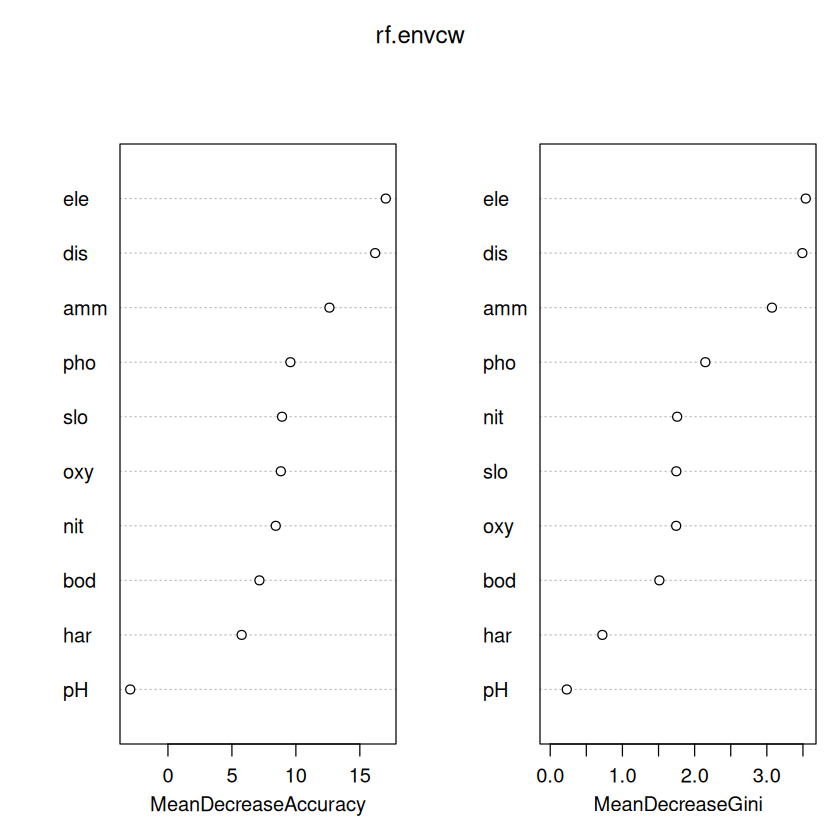

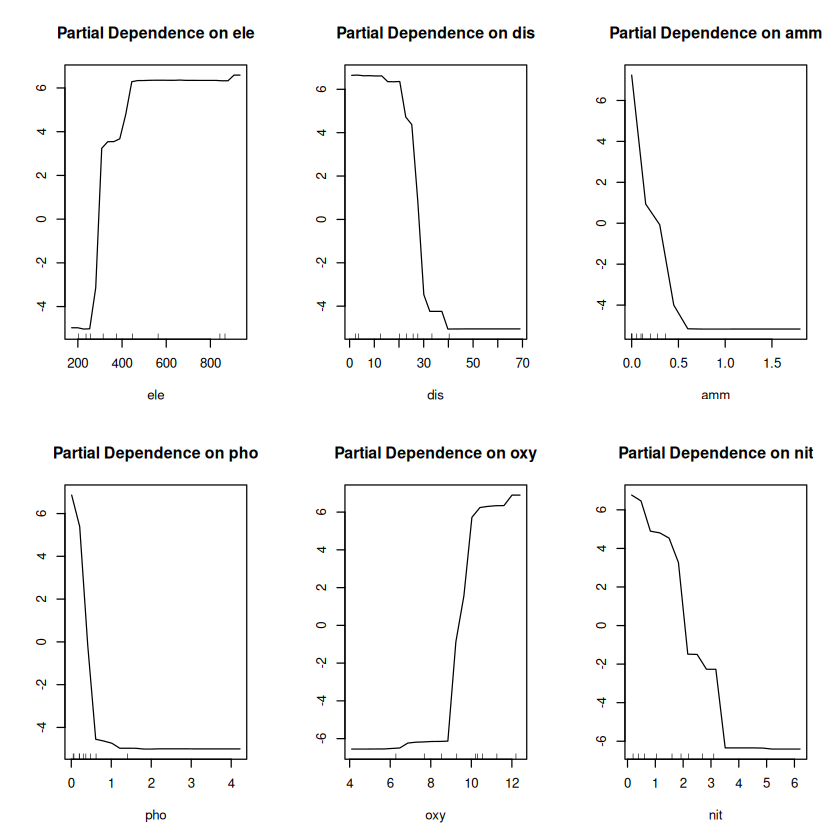

In [59]:
load("Doubs.RData")  
# Load the saved dataset "Doubs.RData" which contains several R objects

# Remove empty site 8
# Remove the 8th row (empty site) from spe, env, spa, and latlong data frames to clean the data
spe <- spe[-8, ]  
env <- env[-8, ]  
spa <- spa[-8, ]  
latlong <- latlong[-8, ]  

# Create env1 by removing the first column from env ( "distance from source")
env1 = env[,-1]  


# Build the Random Forest model  
rf.envcw = randomForest(as.factor(spe.cw.g) ~ ., env1, ntree=500, mtry=3, importance=TRUE,
                        na.action=na.omit, do.trace=100, proximity=TRUE)  
# - as.factor(spe.cw.g) ~ . : target variable (as factor) predicted by all variables in env1  
# - ntree=500 : number of trees to grow  
# - mtry=3 : number of variables randomly sampled at each split  
# - importance=TRUE : compute variable importance  
# - na.action=na.omit : omit rows with missing values  
# - do.trace=100 : print progress every 100 trees  
# - proximity=TRUE : compute proximity matrix between observations

# Print a summary of the trained Random Forest model
rf.envcw  


# Variable importance  
# Display importance metrics for each predictor variable
importance(rf.envcw)  

# Plot variable importance using MeanDecreaseAccuracy and MeanDecreaseGini measures
varImpPlot(rf.envcw)  


# Partial dependence plots  
par(mfrow=c(2,3))  

# Set plotting area to 2 rows and 3 columns for 6 plots
partialPlot(rf.envcw, env1, ele)  
partialPlot(rf.envcw, env1, dis)  
partialPlot(rf.envcw, env1, amm)  
partialPlot(rf.envcw, env1, pho)  
partialPlot(rf.envcw, env1, oxy)  
partialPlot(rf.envcw, env1, nit)  
# For each environmental variable (ele, dis, amm, pho, oxy, nit), plot the partial dependence plot showing
# the average effect of that variable on the predicted outcome (spe.cw.g)
# Helps interpret how each variable influences the model predictions

# HOMEWORK: Model BOD Using Random Forest

- **Task 1**: Build a random forest model  
  Use the environmental variables to predict BOD with the `randomForest()` function.
- **Task 2**: Plot variable importance  
  Visualize which predictors contribute most to the model using `varImpPlot()`.
- **Task 3**: Generate partial dependence plots  
  Create partial dependence plots for selected variables to interpret their effect on BOD predictions.
- **Task 4**: Interpret results  
  Analyze the variable importance and partial dependence plots to understand key environmental drivers of BOD.


In [ ]:
## Task 1: Build a random forest model
# Build the RF model to predict BOD using environmental predictors
rf.bod <- randomForest(___ ~ ele + slo + dis + pH + har + pho + nit + amm + oxy, #Hint : name of the variable we want to predict
                       data = ____,              # Hint: name of your dataframe
                       ntree = ____,             # Hint: number of trees (e.g., 500)
                       mtry = ____,              # Hint: number of variables at each split (e.g., 3)
                       importance = TRUE,        # Compute variable importance
                       proximity = TRUE)         # Compute proximity matrix

In [ ]:
## Task 2: Plot variable importance
# Visualize variable importance of the RF model
varImpPlot(____)                    # Hint: name of your RF model object

In [ ]:
## Task 3: Generate partial dependence plots
# Plot partial dependence for selected predictors
par(mfrow = c(2, 3))                # Set plot layout
partialPlot(____, ____, ____)       # Hint: RF model, dataframe, variable name (e.g., "ele")
partialPlot(____, ____, ____)       # Repeat for other variables (e.g., "dis", "amm", "pho", "oxy", "nit")

In [ ]:
## Task 4: Interpret results
# Write your interpretation based on the varImpPlot and partial dependence plots
# No code here, just observations and conclusions